In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Global_Superstore(CSV).csv",encoding ='latin1')
df.head()

,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [5]:
df.isnull().sum()

ï»¿Row ID           0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [2]:
df.drop('Postal Code',axis=1,inplace =True)
df.columns

Index(['ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df.dtypes

ï»¿Row ID           int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [12]:
df.duplicated().sum()

0

In [15]:
cat_col =df.select_dtypes(include ='object').columns
num_col = df.select_dtypes(exclude='object').columns
print(cat_col)
print(num_col)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')
Index(['ï»¿Row ID', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')


In [16]:
a1 = df.groupby(['Category'])['Sales'].sum()
a1

Category
Furniture          601492.31
Office Supplies    352496.14
Technology         756983.02
Name: Sales, dtype: float64

In [19]:
sc = a1.index.tolist()
ssales =a1.values.tolist()
print(sc)
print(ssales)

['Furniture', 'Office Supplies', 'Technology']
[601492.31, 352496.14, 756983.02]


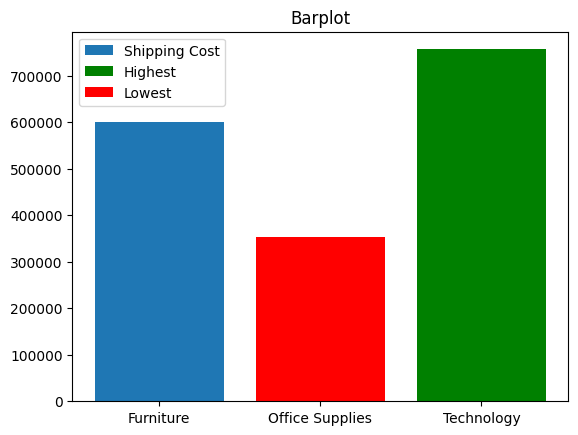

In [21]:
plt.bar(sc,ssales,label='Shipping Cost')
plt.bar(sc[ssales.index(max(ssales))],max(ssales),color='green',label ='Highest')
plt.bar(sc[ssales.index(min(ssales))],min(ssales),color='red',label='Lowest')
plt.title('Barplot')
plt.legend()
plt.show()

In [22]:
a2 = df.groupby(['Segment'])['Sales'].mean()
a2

Segment
Consumer       1729.727564
Corporate      1747.623500
Home Office    1606.010256
Name: Sales, dtype: float64

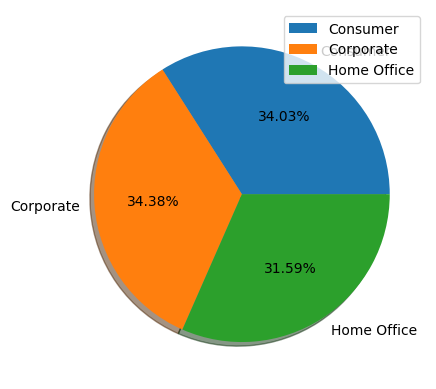

In [31]:
plt.pie(a2.values,labels= a2.index,autopct='%.2f%%',shadow =True,explode=[0,0,0])
plt.legend(loc=1)
plt.show()